# selenium을 이용한 사람인 데이터수집

In [116]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.support import expected_conditions as EC
from tqdm.notebook import tqdm
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
import pandas as pd
import koreanize_matplotlib
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service("../driver/chromedriver"))

url = "https://www.saramin.co.kr/zf_user/search/company?search_area=main&search_done=y&search_optional_item=n&searchType=search&searchword=%EB%A1%9C%EB%B4%87%20SW%20%EA%B0%9C%EB%B0%9C"
driver.get(url)

In [38]:
driver.get(url)

## 자료 수집

### 자료 업로드 Test

#### 메인 화면에서 기업이름, 채용공고 불러오기

In [3]:
from selenium.webdriver.common.by import By

name_job_driver = driver.find_elements(By.ID, "company_info_list")[0]
name_job_driver2 = name_job_driver.find_elements(By.CLASS_NAME, "item_corp")[0]
name = name_job_driver2.find_element(By.TAG_NAME, "a").text
active_job = name_job_driver2.find_element(By.TAG_NAME, "b").text

print(name)
print(active_job)

(주)로보티즈
10


In [ ]:
import time

name_job_driver = driver.find_elements(By.ID, "company_info_list")[0]
name_job_driver2 = name_job_driver.find_elements(By.CLASS_NAME, "item_corp")[0]
name_job_driver2.find_element(By.TAG_NAME, "a").click()

time.sleep(2)
driver.switch_to.window(driver.window_handles[1])

#### 하나 선택해서 자료 수집 테스트 위치 : (주)로보티즈.기업소개

In [ ]:
summary_driver1 = driver.find_element(By.CLASS_NAME, "company_summary")
summary_item1 = summary_driver1.find_elements(By.CLASS_NAME, "company_summary_item")[0]
company_age = summary_item1.find_element(By.CLASS_NAME, "company_summary_tit").text
print(company_age)

업력 27년차


In [ ]:
summary_driver1 = driver.find_element(By.CLASS_NAME, "company_summary")
summary_item1 = summary_driver1.find_elements(By.CLASS_NAME, "company_summary_item")[1]
company_type = summary_item1.find_element(By.CLASS_NAME, "company_summary_tit").text
print(company_type)

중소기업


In [ ]:
summary_driver1 = driver.find_element(By.CLASS_NAME, "company_summary")
summary_item1 = summary_driver1.find_elements(By.CLASS_NAME, "company_summary_item")[2]
employees = summary_item1.find_element(By.CLASS_NAME, "company_summary_tit").text
print(employees)

158 명


In [ ]:
# summary_driver1 = driver.find_element(By.CLASS_NAME, "company_summary")
# summary_item1 = summary_driver1.find_elements(By.CLASS_NAME, "company_summary_item")[3]
# revenue = summary_item1.find_element(By.CLASS_NAME, "company_summary_tit").text
# print(revenue) # 이거는 (주)로보티즈에는 값이 없어 (주)클로봇 직접 클릭해서 확인. 

In [ ]:
summary_driver2 = driver.find_element(By.CLASS_NAME, "company_details")
summary_item2 = summary_driver2.find_elements(By.CLASS_NAME, "company_details_group")[0]
industry = summary_item2.find_element(By.CLASS_NAME, "desc").text
print(industry)

그 외 기타 특수목적용 기계 제조업


In [ ]:
summary_driver2 = driver.find_element(By.CLASS_NAME, "company_details")
summary_item2 = summary_driver2.find_elements(By.CLASS_NAME, "company_details_group")[3]
business_description = summary_item2.find_element(By.CLASS_NAME, "ellipsis").text
print(business_description)

로봇솔루션(로봇에츄에이터모듈,구동소프트웨어),로봇,로봇부품,실내외자율주행로봇 제조,도소매,연구개발/무역


In [ ]:
summary_driver2 = driver.find_element(By.CLASS_NAME, "company_details")
summary_item2 = summary_driver2.find_elements(By.CLASS_NAME, "company_details_group")[4]
address = summary_item2.find_element(By.CLASS_NAME, "ellipsis").text
print(address)

서울 강서구 마곡중앙5로1길 37


In [ ]:
menu_list_driver = driver.find_element(By.CLASS_NAME, "menu_list")
menu_list = menu_list_driver.find_elements(By.CLASS_NAME, "menu_item ")[2]
if menu_list.find_element(By.TAG_NAME, "button").text == "연봉정보":
    menu_list.click()

#### 연봉정보. 현재위치 : (주)로보티즈.연봉정보

In [ ]:
salary_driver = driver.find_element(By.CLASS_NAME, "salaryinfo")
salary_avg = salary_driver.find_element(By.CLASS_NAME, "average_currency").text

print(salary_avg)

5,406 만원


In [ ]:
salary_driver = driver.find_element(By.CLASS_NAME, "salaryinfo")
salary_driver2 = salary_driver.find_element(By.CLASS_NAME, "aver_bar")
salary_min = salary_driver2.find_element(By.CLASS_NAME, "min_txt").text

print(salary_min)

3,130만원


In [ ]:
salary_driver = driver.find_element(By.CLASS_NAME, "salaryinfo")
salary_driver2 = salary_driver.find_element(By.CLASS_NAME, "aver_bar")
salary_max = salary_driver2.find_element(By.CLASS_NAME, "max_txt").text

print(salary_max)

6,948만원


In [ ]:
driver.close()
driver.switch_to.window(driver.window_handles[0])

### page 이동 테스트

In [ ]:
page_driver = driver.find_element(By.CLASS_NAME, "pagination")
pages = page_driver.find_elements(By.TAG_NAME, "a")
len(pages)

10

In [ ]:
count = float(driver.find_element(By.CLASS_NAME, "cnt_result").text[2:-1])
page_num = int((count / 20) + 1)

print(page_num)

21


### 기업소개까지 데이터 수집

In [ ]:
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from tqdm.notebook import tqdm
# from selenium.common.exceptions import NoSuchElementException

# company_step_data_list = []
# company_driver = driver.find_element(By.ID, "company_info_list")
# companies = company_driver.find_elements(By.CLASS_NAME, "item_corp")


# for idx1, company in tqdm(enumerate(companies[:5]), total=len(companies[:5])):
#     item_dict = {}
#     company_step_data_list.append(company.find_element(By.TAG_NAME, "a").text) # 회사명

#     try:
#         company_step_data_list.append(company.find_element(By.TAG_NAME, "b").text) # 진행중 채용공고, 에러는 진행중 채용공고가 없을 때
#     except NoSuchElementException:
#         company_step_data_list.append(False)

#     company.find_element(By.TAG_NAME, "a").click()

#     driver.implicitly_wait(10)

#     driver.switch_to.window(driver.window_handles[1])


#     summary_driver1 = driver.find_element(By.CLASS_NAME, "company_summary")
#     summary_items = summary_driver1.find_elements(By.CLASS_NAME, "company_summary_item")

#     for idx2, summary_item in tqdm(enumerate(summary_items), total=len(summary_items)):
#         item1 = summary_item.find_element(By.CLASS_NAME, "company_summary_tit")

#         if item1.text[:2] == "업력":
#             company_step_data_list.append(item1.text) # 업력
#         else:
#             item2 = summary_item.find_element(By.CLASS_NAME, "company_summary_desc")
#             if item2.text == "기업형태":
#                 item_dict["기업형태"] = item1.text # 기업형태
#             if item2.text == "사원수":
#                 item_dict["사원수"] = item1.text # 사원수
#             if item2.text == "매출액":
#                 item_dict["매출액"] = item1.text #매출액

#     company_step_data_list.append(list(item_dict.items()))

#     driver.close()
#     driver.switch_to.window(driver.window_handles[0])

# print(company_step_data_list)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

KeyboardInterrupt: 

### 기업소개 + 연봉정보까지 들려서 데이터 수집

In [ ]:
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from tqdm.notebook import tqdm
# from selenium.common.exceptions import NoSuchElementException

# company_page_data_list = []
# company_driver = driver.find_element(By.ID, "company_info_list")
# companies = company_driver.find_elements(By.CLASS_NAME, "item_corp")


# for idx1, company in tqdm(enumerate(companies[:5]), total=len(companies[:5])):
#     company_step_data_list = []
#     item_dict = {}
#     company_step_data_list.append(company.find_element(By.TAG_NAME, "a").text) # 회사명

#     try:
#         company_step_data_list.append(company.find_element(By.TAG_NAME, "b").text) # 진행중 채용공고, 에러는 진행중 채용공고가 없을 때
#     except NoSuchElementException:
#         company_step_data_list.append(False)

#     company.find_element(By.TAG_NAME, "a").click()

#     driver.implicitly_wait(10)

#     driver.switch_to.window(driver.window_handles[1])


#     summary_driver1 = driver.find_element(By.CLASS_NAME, "company_summary")
#     summary_items = summary_driver1.find_elements(By.CLASS_NAME, "company_summary_item")

#     for summary_item in summary_items:
#         item1 = summary_item.find_element(By.CLASS_NAME, "company_summary_tit")

#         if item1.text[:2] == "업력":
#             company_step_data_list.append(item1.text) # 업력
#         else:
#             item2 = summary_item.find_element(By.CLASS_NAME, "company_summary_desc")
#             if item2.text == "기업형태":
#                 item_dict["기업형태"] = item1.text # 기업형태
#             if item2.text == "사원수":
#                 item_dict["사원수"] = item1.text # 사원수
#             if item2.text == "매출액":
#                 item_dict["매출액"] = item1.text #매출액

#     company_step_data_list.append(list(item_dict.items()))

#     #########

#     menu_list_driver = driver.find_element(By.CLASS_NAME, "menu_list")
#     menus = menu_list_driver.find_elements(By.CLASS_NAME, "menu_item ")

#     for menu in menus:
#         if menu.find_element(By.TAG_NAME, "button").text == "연봉정보":
#             menu.click()
#             driver.implicitly_wait(10)
#             break

#     salary_driver = driver.find_element(By.CLASS_NAME, "salaryinfo")
#     salary_avg = salary_driver.find_element(By.CLASS_NAME, "average_currency").text
#     company_step_data_list.append(salary_avg)

#     salary_driver = driver.find_element(By.CLASS_NAME, "salaryinfo")
#     salary_driver2 = salary_driver.find_element(By.CLASS_NAME, "aver_bar")
#     salary_min = salary_driver2.find_element(By.CLASS_NAME, "min_txt").text
#     company_step_data_list.append(salary_min)

#     salary_driver = driver.find_element(By.CLASS_NAME, "salaryinfo")
#     salary_driver2 = salary_driver.find_element(By.CLASS_NAME, "aver_bar")
#     salary_max = salary_driver2.find_element(By.CLASS_NAME, "max_txt").text
#     company_step_data_list.append(salary_max)

#     company_page_data_list.append(company_step_data_list) # 한 페이지에 속하는 회사 데이터를 append

#     driver.close()
#     driver.switch_to.window(driver.window_handles[0])

# print(company_page_data_list)

  0%|          | 0/5 [00:00<?, ?it/s]

[['(주)로보티즈', '11', '업력 27년차', [('기업형태', '중소기업'), ('사원수', '158 명')], '5,406 만원', '3,130만원', '6,948만원'], ['휴림로봇(주)', '4', '업력 27년차', [('사원수', '63 명')], '4,268 만원', '2,824만원', '6,216만원'], ['(주)클로봇', '4', '업력 9년차', [('기업형태', '스타트업'), ('사원수', '136 명'), ('매출액', '134억 4,336만원')], '6,605 만원', '3,462만원', '7,915만원'], ['(주)마루에이치알', '27', '업력 20년차', [('기업형태', '중소기업'), ('사원수', '247 명'), ('매출액', '203억 5,881만원')], '3,573 만원', '2,450만원', '4,971만원'], ['(주)세스텍', '3', '업력 27년차', [('기업형태', '중소기업'), ('사원수', '107 명'), ('매출액', '341억 1,870만원')], '6,287 만원', '3,456만원', '7,138만원']]


### ( 기업소개 + 연봉정보 데이터 수집 ) + page 넘어가면서

In [ ]:
# from selenium.webdriver.support import expected_conditions as EC
# from tqdm.notebook import tqdm
# from selenium.common.exceptions import NoSuchElementException

# url_list = []
# company_total_data_list = []
# count = float(driver.find_element(By.CLASS_NAME, "cnt_result").text[2:-1])
# page_num = int((count / 20) + 1)
# url_prefix = "https://www.saramin.co.kr/zf_user/search/company?searchword=%EB%A1%9C%EB%B4%87+SW+%EA%B0%9C%EB%B0%9C&page="
# url_suffix = "&searchType=search&pageCount=20&mainSearch=n"

# for i in range(1, page_num):
#     tmp_url = url_prefix + str(i) + url_suffix
#     url_list.append(tmp_url)

# driver.quit()

# for page_idx, current_url in tqdm(enumerate(url_list[:3]), total=len(url_list[:3])):
#     options = webdriver.ChromeOptions()
#     driver = webdriver.Chrome(service=Service("../driver/chromedriver"))
#     driver.get(current_url)

#     company_page_data_list = []
#     company_driver = driver.find_element(By.ID, "company_info_list")
#     companies = company_driver.find_elements(By.CLASS_NAME, "item_corp")

#     for idx1, company in tqdm(enumerate(companies[:5]), total=len(companies[:5])):
#         salary_check = True
#         item_dict = {}
#         company_step_data_list = []
#         company_step_data_list.append(company.find_element(By.TAG_NAME, "a").text) # 회사명

#         try:
#             company_step_data_list.append(company.find_element(By.TAG_NAME, "b").text) # 진행중 채용공고, 에러는 진행중 채용공고가 없을 때
#         except NoSuchElementException:
#             company_step_data_list.append(False)


#         company.find_element(By.TAG_NAME, "a").click()
#         driver.implicitly_wait(10)
#         driver.switch_to.window(driver.window_handles[1])


#         summary_driver1 = driver.find_element(By.CLASS_NAME, "company_summary")
#         summary_items = summary_driver1.find_elements(By.CLASS_NAME, "company_summary_item")

#         for summary_item in summary_items:
#             item1 = summary_item.find_element(By.CLASS_NAME, "company_summary_tit")

#             if item1.text[:2] == "업력":
#                 company_step_data_list.append(item1.text) # 업력
#             else:
#                 item2 = summary_item.find_element(By.CLASS_NAME, "company_summary_desc")
#                 if item2.text == "기업형태":
#                     item_dict["기업형태"] = item1.text # 기업형태
#                 if item2.text == "사원수":
#                     item_dict["사원수"] = item1.text # 사원수
#                 if item2.text == "매출액":
#                     item_dict["매출액"] = item1.text # 매출액

#         company_step_data_list.append(list(item_dict.items()))

#         #########

#         menu_list_driver = driver.find_element(By.CLASS_NAME, "menu_list")
#         menus = menu_list_driver.find_elements(By.CLASS_NAME, "menu_item ")

#         for menu in menus:
#             if menu.find_element(By.TAG_NAME, "button").text == "연봉정보":
#                 menu.click()
#                 driver.implicitly_wait(10)
#                 break
#             if menu == menus[len(menus)-1]:
#                 salary_check = False
#                 company_page_data_list.append(company_step_data_list) # 한 페이지에 속하는 회사 데이터를 append
#                 driver.close()
#                 driver.switch_to.window(driver.window_handles[0])
        
#         if salary_check:
#             salary_driver = driver.find_element(By.CLASS_NAME, "salaryinfo")
#             salary_avg = salary_driver.find_element(By.CLASS_NAME, "average_currency").text
#             company_step_data_list.append(salary_avg)

#             salary_driver2 = salary_driver.find_element(By.CLASS_NAME, "aver_bar")
#             salary_min = salary_driver2.find_element(By.CLASS_NAME, "min_txt").text
#             company_step_data_list.append(salary_min)

#             salary_max = salary_driver2.find_element(By.CLASS_NAME, "max_txt").text
#             company_step_data_list.append(salary_max)

#             company_page_data_list.append(company_step_data_list) # 회사 하나에 속하는 데이터를 append

#             driver.close()
#             driver.switch_to.window(driver.window_handles[0])
#         else:
#             company_step_data_list.append(False)
#             company_step_data_list.append(False)
#             company_step_data_list.append(False)

#             company_page_data_list.append(company_step_data_list) # 회사 하나에 속하는 데이터를 append

#     company_total_data_list.append(company_page_data_list) # page에 있는 회사 데이터를 append
    
# print(company_total_data_list)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[[['(주)로보티즈', '11', '업력 27년차', [('기업형태', '중소기업'), ('사원수', '158 명')], '5,406 만원', '3,130만원', '6,948만원'], ['휴림로봇(주)', '4', '업력 27년차', [('사원수', '63 명')], '4,268 만원', '2,824만원', '6,216만원'], ['(주)클로봇', '4', '업력 9년차', [('기업형태', '스타트업'), ('사원수', '136 명'), ('매출액', '134억 4,336만원')], '6,605 만원', '3,462만원', '7,915만원'], ['(주)마루에이치알', '27', '업력 20년차', [('기업형태', '중소기업'), ('사원수', '247 명'), ('매출액', '203억 5,881만원')], '3,573 만원', '2,450만원', '4,971만원'], ['(주)세스텍', '3', '업력 27년차', [('기업형태', '중소기업'), ('사원수', '107 명'), ('매출액', '341억 1,870만원')], '6,287 만원', '3,456만원', '7,138만원']], [['(주)링크솔루션', '5', '업력 11년차', [('기업형태', '중소기업'), ('사원수', '57 명'), ('매출액', '72억 9,448만원')], '6,090 만원', '3,475만원', '7,167만원'], ['(주)럭스로보', '8', '업력 12년차', [('기업형태', '스타트업'), ('사원수', '81 명')], False, False, False], ['(주)럭스로보', '8', '업력 12년차', [('기업형태', '스타트업'), ('사원수', '81 명')], False, False, False], ['(주)알티올', '11', '업력 9년차', [('기업형태', '중소기업'), ('사원수', '42 명'), ('매출액', '60억 6,294만원')], '6,977 만원', '3,482만원', '8,158만원'], ['(주)아르고스다인'

### 최종 데이터 수집정리

In [62]:
from selenium.webdriver.support import expected_conditions as EC
from tqdm.notebook import tqdm
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait

url_list = []
company_total_data_list = []
count = float(driver.find_element(By.CLASS_NAME, "cnt_result").text[2:-1])
page_num = int((count / 20) + 1)
url_prefix = "https://www.saramin.co.kr/zf_user/search/company?searchword=%EB%A1%9C%EB%B4%87+SW+%EA%B0%9C%EB%B0%9C&page="
url_suffix = "&searchType=search&pageCount=20&mainSearch=n"

for i in range(1, page_num+1):
    tmp_url = url_prefix + str(i) + url_suffix
    url_list.append(tmp_url)

driver.quit()

for page_idx, current_url in tqdm(enumerate(url_list), total=len(url_list)):
    options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(service=Service("../driver/chromedriver"))
    driver.get(current_url)

    company_page_data_list = []
    company_driver = driver.find_element(By.ID, "company_info_list")
    companies = company_driver.find_elements(By.CLASS_NAME, "item_corp")

    for company_idx, company in tqdm(enumerate(companies), total=len(companies)):
        salary_check = True
        item_dict = {}
        company_step_data_list = []
        company_step_data_list.append(company.find_element(By.TAG_NAME, "a").text) # 회사명

        try:
            company_step_data_list.append(company.find_element(By.TAG_NAME, "b").text) # 진행중 채용공고, 에러는 진행중 채용공고가 없을 때
        except NoSuchElementException:
            company_step_data_list.append(False)


        company.find_element(By.TAG_NAME, "a").click()
        WebDriverWait(driver, 10).until(EC.new_window_is_opened)
        driver.switch_to.window(driver.window_handles[1])


        summary_driver1 = driver.find_element(By.CLASS_NAME, "company_summary")
        summary_items = summary_driver1.find_elements(By.CLASS_NAME, "company_summary_item")

        for summary_item in summary_items:
            item1 = summary_item.find_element(By.CLASS_NAME, "company_summary_tit")

            if item1.text[:2] == "업력":
                item_dict["업력"] = item1.text
            else:
                item2 = summary_item.find_element(By.CLASS_NAME, "company_summary_desc")
                if item2.text == "기업형태":
                    item_dict["기업형태"] = item1.text # 기업형태
                if item2.text == "사원수":
                    item_dict["사원수"] = item1.text # 사원수
                if item2.text == "매출액":
                    item_dict["매출액"] = item1.text # 매출액

        company_step_data_list.append(list(item_dict.items()))

        #########

        menu_list_driver = driver.find_element(By.CLASS_NAME, "menu_list")
        menus = menu_list_driver.find_elements(By.CLASS_NAME, "menu_item ")

        for menu in menus:
            if menu.find_element(By.TAG_NAME, "button").text == "연봉정보":
                menu.click()
                driver.implicitly_wait(10)
                break
            if menu == menus[len(menus)-1]:
                salary_check = False
                company_page_data_list.append(company_step_data_list) # 한 페이지에 속하는 회사 데이터를 append
                driver.close()
                driver.switch_to.window(driver.window_handles[0])
        
        if salary_check:
            salary_driver = driver.find_element(By.CLASS_NAME, "salaryinfo")
            salary_avg = salary_driver.find_element(By.CLASS_NAME, "average_currency").text
            company_step_data_list.append(salary_avg)

            salary_driver2 = salary_driver.find_element(By.CLASS_NAME, "aver_bar")
            salary_min = salary_driver2.find_element(By.CLASS_NAME, "min_txt").text
            company_step_data_list.append(salary_min)

            salary_max = salary_driver2.find_element(By.CLASS_NAME, "max_txt").text
            company_step_data_list.append(salary_max)

            company_page_data_list.append(company_step_data_list) # 회사 하나에 속하는 데이터를 append

            driver.close()
            driver.switch_to.window(driver.window_handles[0])
        else:
            company_step_data_list.append(False)
            company_step_data_list.append(False)
            company_step_data_list.append(False)

    company_total_data_list.append(company_page_data_list) # page에 있는 회사 데이터를 append
    print(company_total_data_list[page_idx])
    print(len(company_page_data_list))
    driver.quit()
    
print(company_total_data_list)
print(len(company_total_data_list))

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[['(주)로보티즈', '10', [('업력', '업력 27년차'), ('기업형태', '중소기업'), ('사원수', '158 명')], '5,406 만원', '3,130만원', '6,948만원'], ['두산로보틱스(주)', False, [('업력', '업력 11년차'), ('기업형태', '대기업'), ('사원수', '235 명')], False, False, False], ['휴림로봇(주)', '4', [('업력', '업력 27년차'), ('사원수', '63 명')], '4,268 만원', '2,824만원', '6,216만원'], ['(주)클로봇', '5', [('업력', '업력 9년차'), ('기업형태', '스타트업'), ('사원수', '136 명'), ('매출액', '134억 4,336만원')], '6,605 만원', '3,462만원', '7,915만원'], ['(주)마루에이치알', '29', [('업력', '업력 20년차'), ('기업형태', '중소기업'), ('사원수', '247 명'), ('매출액', '203억 5,881만원')], '3,573 만원', '2,450만원', '4,971만원'], ['(주)세스텍', '3', [('업력', '업력 27년차'), ('기업형태', '중소기업'), ('사원수', '107 명'), ('매출액', '341억 1,870만원')], '6,287 만원', '3,456만원', '7,138만원'], ['(주)엠앤디', '4', [('업력', '업력 26년차'), ('기업형태', '중소기업'), ('사원수', '59 명'), ('매출액', '70억 3,795만원')], '6,499 만원', '3,646만원', '7,498만원'], ['(주)아이지', '5', [('업력', '업력 17년차'), ('기업형태', '중소기업'), ('사원수', '58 명'), ('매출액', '184억 2,468만원')], '4,957 만원', '2,962만원', '6,543만원'], ['(사)캠틱종합기술원', '4', [('기업형태', '중소기업

  0%|          | 0/20 [00:00<?, ?it/s]

[['(주)링크솔루션', '5', [('업력', '업력 11년차'), ('기업형태', '중소기업'), ('사원수', '57 명'), ('매출액', '72억 9,448만원')], '6,090 만원', '3,475만원', '7,167만원'], ['(주)알티올', '15', [('업력', '업력 9년차'), ('기업형태', '중소기업'), ('사원수', '42 명'), ('매출액', '60억 6,294만원')], '6,977 만원', '3,482만원', '8,158만원'], ['(주)럭스로보', '7', [('업력', '업력 12년차'), ('기업형태', '스타트업'), ('사원수', '81 명')], False, False, False], ['(주)에이트테크', '3', [('업력', '업력 6년차'), ('기업형태', '중소기업'), ('사원수', '51 명')], '5,238 만원', '3,074만원', '6,617만원'], ['코가로보틱스(주)', '2', [('업력', '업력 9년차'), ('기업형태', '중소기업'), ('사원수', '71 명'), ('매출액', '13억 190만원')], '5,649 만원', '3,153만원', '7,252만원'], ['(주)로보스', '1', [('업력', '업력 4년차'), ('기업형태', '중소기업'), ('사원수', '38 명')], '7,534 만원', '4,110만원', '8,360만원'], ['(주)무진기연', '5', [('업력', '업력 27년차'), ('기업형태', '중소기업'), ('사원수', '60 명'), ('매출액', '190억 6,370만원')], '6,283 만원', '3,454만원', '7,017만원'], ['(주)바질컴퍼니', '3', [('업력', '업력 8년차'), ('기업형태', '중소기업'), ('사원수', '28 명'), ('매출액', '29억 527만원')], '5,136 만원', '3,037만원', '6,483만원'], ['(주)한컴어썸텍', '4', [('업력', '업력 8년

  0%|          | 0/20 [00:00<?, ?it/s]

[['(주)솔코', '1', [('업력', '업력 17년차'), ('기업형태', '중소기업'), ('사원수', '20 명'), ('매출액', '82억 9,945만원')], '7,105 만원', '3,838만원', '7,671만원'], ['(주)노바', '1', [('업력', '업력 15년차'), ('기업형태', '스타트업'), ('사원수', '31 명'), ('매출액', '40억 540만원')], '6,521 만원', '3,652만원', '7,320만원'], ['(주)애니토이', '3', [('업력', '업력 14년차'), ('기업형태', '중소기업'), ('사원수', '15 명'), ('매출액', '33억 6,952만원')], '4,848 만원', '2,934만원', '6,270만원'], ['(주)모디', '1', [('업력', '업력 7년차'), ('기업형태', '중소기업'), ('사원수', '7 명'), ('매출액', '13억 6,299만원')], '4,389 만원', '2,992만원', '5,892만원'], ['(주)아인잡', '7', [('업력', '업력 9년차'), ('기업형태', '중소기업'), ('사원수', '3 명'), ('매출액', '3,150만원')], False, False, False], ['(주)타스글로벌', '1', [('업력', '업력 12년차'), ('기업형태', '중소기업'), ('매출액', '24억 3,350만원')], '5,405 만원', '3,120만원', '6,535만원'], ['(주)테이아', '4', [('업력', '업력 11년차'), ('기업형태', '중소기업'), ('사원수', '74 명'), ('매출액', '104억 4,773만원')], '5,788 만원', '3,188만원', '7,345만원'], ['(주)에스엘엠', '2', [('업력', '업력 8년차'), ('기업형태', '중소기업'), ('사원수', '38 명'), ('매출액', '21억 3,382만원')], False, False, False], ['인

  0%|          | 0/20 [00:00<?, ?it/s]

[['(주)세성', False, [('업력', '업력 26년차'), ('기업형태', '중소기업'), ('사원수', '40 명'), ('매출액', '528억 9,063만원')], '4,613 만원', '2,889만원', '5,723만원'], ['(주)엠텍정보기술', '1', [('업력', '업력 13년차'), ('기업형태', '중소기업'), ('사원수', '9 명'), ('매출액', '18억 4,938만원')], '6,241 만원', '3,648만원', '6,931만원'], ['(주)케이아이', False, [('업력', '업력 28년차'), ('기업형태', '중소기업'), ('사원수', '4 명'), ('매출액', '48억 2,858만원')], False, False, False], ['(주)한국엔에스디', '2', [('업력', '업력 14년차'), ('기업형태', '중소기업'), ('매출액', '42억 8,948만원')], False, False, False], ['(주)메이킷올', '1', [('업력', '업력 8년차'), ('기업형태', '중소기업'), ('사원수', '4 명'), ('매출액', '14억 4,342만원')], '3,233 만원', '2,351만원', '5,041만원'], ['(주)디엠비에이치', False, [('업력', '업력 23년차'), ('기업형태', '중소기업'), ('사원수', '6 명'), ('매출액', '24억 9,251만원')], '7,090 만원', '4,229만원', '7,601만원'], ['포미(주)', False, [('업력', '업력 23년차'), ('기업형태', '중소기업'), ('사원수', '18 명'), ('매출액', '44억 4,476만원')], '3,564 만원', '2,504만원', '5,602만원'], ['(주)아폴로로보틱스', False, [('업력', '업력 26년차'), ('기업형태', '중소기업'), ('사원수', '21 명'), ('매출액', '64억 6,777만원')], '4,389 만원'

  0%|          | 0/20 [00:00<?, ?it/s]

[['(주)성호하이텍', False, [('업력', '업력 20년차'), ('기업형태', '스타트업'), ('사원수', '19 명'), ('매출액', '49억 4,228만원')], '4,997 만원', '2,981만원', '6,253만원'], ['(주)도로', '3', [('업력', '업력 3년차'), ('기업형태', '중소기업'), ('사원수', '5 명'), ('매출액', '6억 6,505만원')], '3,447 만원', '2,440만원', '5,343만원'], ['(주)아코스쿨', '2', [('업력', '업력 4년차'), ('기업형태', '중소기업'), ('사원수', '6 명'), ('매출액', '10억 6,200만원')], '3,937 만원', '2,715만원', '6,009만원'], ['(주)크레듀', '2', [('업력', '업력 8년차'), ('기업형태', '중소기업'), ('사원수', '5 명'), ('매출액', '7억 9,274만원')], '2,571 만원', '2,265만원', '6,043만원'], ['(주)디엠에스', False, [('업력', '업력 17년차'), ('기업형태', '중소기업'), ('사원수', '17 명'), ('매출액', '38억 2,844만원')], '4,639 만원', '2,898만원', '6,715만원'], ['(주)지오테크시스템', False, [('업력', '업력 21년차'), ('기업형태', '중소기업'), ('사원수', '13 명'), ('매출액', '63억 5,867만원')], '3,702 만원', '2,538만원', '5,279만원'], ['(주)소디스', False, [('업력', '업력 19년차'), ('기업형태', '중소기업'), ('사원수', '17 명'), ('매출액', '45억 882만원')], '5,875 만원', '3,387만원', '6,942만원'], ['(주)모션디바이스', False, [('업력', '업력 15년차'), ('기업형태', '중소기업'), ('사원수', '14 명'), (

  0%|          | 0/20 [00:00<?, ?it/s]

[['(주)리눅스아이티', False, [('업력', '업력 19년차'), ('기업형태', '스타트업'), ('사원수', '11 명'), ('매출액', '20억 8,934만원')], '3,569 만원', '2,621만원', '5,168만원'], ['(주)씨엘에프하이텍', False, [('업력', '업력 17년차'), ('기업형태', '중소기업'), ('사원수', '0 명'), ('매출액', '16억 3,692만원')], False, False, False], ['(주)세이프티랩', '1', [('업력', '업력 8년차'), ('기업형태', '중소기업'), ('사원수', '10 명'), ('매출액', '3억 8,510만원')], '3,928 만원', '2,730만원', '5,695만원'], ['(주)지오로봇', '1', [('업력', '업력 4년차'), ('기업형태', '중소기업'), ('사원수', '16 명'), ('매출액', '7,036만원')], '5,957 만원', '3,415만원', '7,019만원'], ['(주)엣지크로스', False, [('업력', '업력 11년차'), ('기업형태', '스타트업'), ('사원수', '29 명'), ('매출액', '30억 1,620만원')], '6,054 만원', '3,440만원', '7,508만원'], ['(주)오토피디아', False, [('업력', '업력 7년차'), ('기업형태', '중소기업'), ('사원수', '17 명'), ('매출액', '110억 3,746만원')], '6,242 만원', '3,429만원', '7,274만원'], ['(주)유니드', False, [('업력', '업력 15년차'), ('기업형태', '중소기업'), ('사원수', '26 명'), ('매출액', '25억 3,669만원')], '3,497 만원', '2,465만원', '5,682만원'], ['로드러너(주)', False, [('업력', '업력 5년차'), ('기업형태', '중소기업'), ('사원수', '38 명'), ('매출액'

  0%|          | 0/20 [00:00<?, ?it/s]

[['(주)오픈네트웍시스템', False, [('업력', '업력 27년차'), ('기업형태', '중소기업'), ('사원수', '18 명'), ('매출액', '244억 7,242만원')], '5,203 만원', '3,045만원', '7,301만원'], ['지오소나(주)', False, [('업력', '업력 7년차'), ('기업형태', '중소기업'), ('사원수', '9 명'), ('매출액', '23억 4,079만원')], '4,940 만원', '2,963만원', '6,310만원'], ['좋은기술', False, [('기업형태', '스타트업'), ('매출액', '16억 9,173만원')], False, False, False], ['(주)세계로시스템', False, [('업력', '업력 12년차'), ('기업형태', '중소기업'), ('매출액', '137억 3,240만원')], False, False, False], ['(주)아프스', '1', [('업력', '업력 8년차'), ('기업형태', '중소기업'), ('사원수', '5 명')], '5,841 만원', '3,593만원', '6,727만원'], ['네오아크로보틱스', '1', [('업력', '업력 2년차'), ('기업형태', '중소기업'), ('사원수', '3 명')], False, False, False], ['(주)스마트시스템즈', False, [('업력', '업력 5년차'), ('기업형태', '중소기업'), ('사원수', '11 명'), ('매출액', '71억 7,320만원')], '4,372 만원', '2,861만원', '5,922만원'], ['(주)헬퍼로보틱스', '1', [('업력', '업력 5년차'), ('기업형태', '중소기업'), ('사원수', '15 명')], False, False, False], ['(주)에로바테크놀러지', False, [('업력', '업력 24년차'), ('기업형태', '중소기업'), ('사원수', '7 명'), ('매출액', '45억 549만원')], '7,625 만

  0%|          | 0/20 [00:00<?, ?it/s]

[['(주)태경자동화', False, [('업력', '업력 23년차'), ('기업형태', '중소기업'), ('사원수', '6 명'), ('매출액', '22억 9,102만원')], False, False, False], ['(주)에이더블테크놀러지', False, [('업력', '업력 14년차'), ('기업형태', '중소기업'), ('사원수', '14 명'), ('매출액', '44억 8,601만원')], '5,944 만원', '3,410만원', '7,125만원'], ['(주)엔티로보틱스', False, [('업력', '업력 17년차'), ('기업형태', '중소기업'), ('사원수', '8 명'), ('매출액', '24억 4,397만원')], False, False, False], ['(주)알엔티', False, [('업력', '업력 4년차'), ('기업형태', '중소기업'), ('사원수', '8 명'), ('매출액', '29억 246만원')], '5,830 만원', '3,589만원', '6,676만원'], ['(주)젠아트', False, [('업력', '업력 16년차'), ('기업형태', '중소기업'), ('사원수', '5 명'), ('매출액', '20억 7,079만원')], '4,165 만원', '2,802만원', '5,597만원'], ['(주)와이즈박스', False, [('업력', '업력 22년차'), ('기업형태', '중소기업'), ('사원수', '21 명'), ('매출액', '45억 164만원')], '4,428 만원', '2,793만원', '6,081만원'], ['(유)와이지솔루션', False, [('업력', '업력 9년차'), ('기업형태', '중소기업'), ('매출액', '43억 7,435만원')], '6,687 만원', '3,747만원', '7,351만원'], ['(주)레몬소프트', False, [('업력', '업력 12년차'), ('기업형태', '중소기업'), ('사원수', '19 명'), ('매출액', '19억 2,635만원')], '4,33

  0%|          | 0/20 [00:00<?, ?it/s]

[['(주)에이로봇', False, [('업력', '업력 8년차'), ('기업형태', '중소기업'), ('사원수', '18 명'), ('매출액', '5억 8,979만원')], '4,325 만원', '2,819만원', '6,055만원'], ['(주)테이슨', False, [('업력', '업력 13년차'), ('기업형태', '중소기업'), ('사원수', '9 명'), ('매출액', '5억 3,956만원')], '4,602 만원', '2,870만원', '6,480만원'], ['(주)램플', False, [('업력', '업력 8년차'), ('기업형태', '중소기업'), ('사원수', '6 명'), ('매출액', '5억 121만원')], '3,521 만원', '2,604만원', '4,993만원'], ['(주)아원기술', False, [('업력', '업력 7년차'), ('기업형태', '중소기업'), ('사원수', '7 명'), ('매출액', '3억 2,521만원')], '3,736 만원', '2,669만원', '5,401만원'], ['(주)나인티시스템', False, [('업력', '업력 25년차'), ('기업형태', '중소기업'), ('사원수', '3 명'), ('매출액', '8억 3,130만원')], '4,890 만원', '2,920만원', '6,488만원'], ['(주)와우미래기술', False, [('업력', '업력 9년차'), ('기업형태', '중소기업'), ('사원수', '7 명'), ('매출액', '12억 2,726만원')], '4,079 만원', '2,772만원', '5,379만원'], ['(주)조은에듀테크', False, [('업력', '업력 8년차'), ('기업형태', '중소기업'), ('사원수', '14 명'), ('매출액', '13억 3,118만원')], '3,947 만원', '2,610만원', '5,470만원'], ['드림로보', False, [('기업형태', '중소기업'), ('매출액', '1억 3,663만원')], False, False, Fa

  0%|          | 0/20 [00:00<?, ?it/s]

[['(주)시아', False, [('업력', '업력 3년차'), ('기업형태', '중소기업'), ('사원수', '5 명'), ('매출액', '7,824만원')], '2,813 만원', '2,061만원', '5,162만원'], ['(주)이스타이엔지', False, [('업력', '업력 5년차'), ('기업형태', '중소기업'), ('사원수', '6 명'), ('매출액', '12억 6,668만원')], '3,264 만원', '2,465만원', '5,025만원'], ['아비만로보랩 주식회사', False, [('업력', '업력 3년차')], '5,766 만원', '3,295만원', '6,856만원'], ['코리아소프트(주)', False, [('업력', '업력 8년차'), ('기업형태', '중소기업'), ('사원수', '12 명'), ('매출액', '14억 7,384만원')], '5,848 만원', '3,348만원', '7,554만원'], ['케이에이앤', False, [('기업형태', '중소기업'), ('매출액', '3억 9,590만원')], False, False, False], ['(주)에스와이이노테크', False, [('업력', '업력 11년차'), ('기업형태', '중소기업'), ('사원수', '6 명'), ('매출액', '13억 6,072만원')], '4,787 만원', '3,099만원', '6,051만원'], ['(주)클레빌', False, [('업력', '업력 5년차'), ('기업형태', '중소기업'), ('사원수', '3 명'), ('매출액', '2억 1,336만원')], '3,982 만원', '2,622만원', '5,519만원'], ['리릭코리아(주)', False, [('업력', '업력 3년차'), ('기업형태', '중견기업'), ('사원수', '6 명')], '6,210 만원', '3,637만원', '6,980만원'], ['아이브이에스IVS', False, [('기업형태', '중소기업'), ('매출액', '2억 9,807만원')], Fals

  0%|          | 0/20 [00:00<?, ?it/s]

[['(주)쿳션', False, [('업력', '업력 4년차'), ('기업형태', '중소기업'), ('사원수', '20 명'), ('매출액', '2억 4,927만원')], '3,619 만원', '2,574만원', '5,766만원'], ['(주)옐로펀트로봇', False, [('업력', '업력 4년차'), ('기업형태', '중소기업'), ('사원수', '7 명'), ('매출액', '8억 691만원')], '4,676 만원', '3,060만원', '5,995만원'], ['써니팩토리', False, [('기업형태', '중소기업'), ('매출액', '12억 6,176만원')], False, False, False], ['(주)페이텀', False, [('업력', '업력 24년차'), ('기업형태', '중소기업')], False, False, False], ['(주)레디츠', False, [('업력', '업력 5년차'), ('기업형태', '중소기업'), ('사원수', '3 명'), ('매출액', '2억 6,647만원')], '3,190 만원', '2,381만원', '5,439만원'], ['(주)케이피씨전자', False, [('업력', '업력 15년차'), ('기업형태', '중소기업'), ('사원수', '5 명'), ('매출액', '8억 2,921만원')], '4,224 만원', '2,952만원', '5,632만원'], ['(주)알오지스틱스', False, [('업력', '업력 3년차'), ('기업형태', '중소기업'), ('사원수', '6 명'), ('매출액', '748만원')], '4,591 만원', '2,839만원', '6,307만원'], ['(주)따따스튜디오', False, [('업력', '업력 12년차'), ('기업형태', '중소기업'), ('사원수', '8 명'), ('매출액', '3억 7,333만원')], '3,023 만원', '2,442만원', '4,991만원'], ['(주)새비로보틱스', False, [('업력', '업력 4년차'), ('기업형태', '

  0%|          | 0/20 [00:00<?, ?it/s]

[['(주)테스프', False, [('업력', '업력 3년차'), ('기업형태', '중소기업'), ('사원수', '10 명'), ('매출액', '1억 2,047만원')], '3,119 만원', '2,447만원', '4,696만원'], ['(주)지능로봇스튜디오', False, [('기업형태', '중소기업'), ('사원수', '4 명'), ('매출액', '7억 3,569만원')], '4,233 만원', '2,792만원', '5,633만원'], ['(주)디웹스', False, [('업력', '업력 10년차'), ('기업형태', '중소기업'), ('사원수', '3 명'), ('매출액', '2억 8,038만원')], '3,762 만원', '2,530만원', '5,514만원'], ['(주)플롯팩토리', False, [('업력', '업력 4년차'), ('기업형태', '중소기업'), ('사원수', '7 명'), ('매출액', '6억 3,522만원')], '3,285 만원', '2,543만원', '5,373만원'], ['(주)에이아이에스', False, [('업력', '업력 9년차'), ('기업형태', '중소기업'), ('사원수', '8 명')], '5,467 만원', '3,148만원', '6,770만원'], ['(주)차로보틱스', False, [('업력', '업력 3년차'), ('기업형태', '중소기업'), ('사원수', '5 명'), ('매출액', '1억 9,141만원')], '3,446 만원', '2,468만원', '5,200만원'], ['(주)아디아랩', False, [('업력', '업력 7년차'), ('기업형태', '중소기업'), ('사원수', '6 명')], '4,135 만원', '2,773만원', '6,128만원'], ['마린로보틱스(주)', False, [('업력', '업력 14년차'), ('기업형태', '중소기업'), ('사원수', '8 명'), ('매출액', '4억 5,250만원')], '2,384 만원', '1,978만원', '4,651만원'], ['(주

  0%|          | 0/20 [00:00<?, ?it/s]

[['(주)라이트테크', False, [('기업형태', '중소기업'), ('사원수', '3 명'), ('매출액', '4억 9,306만원')], '8,947 만원', '4,730만원', '9,784만원'], ['(주)한아시스템', False, [('기업형태', '중소기업'), ('매출액', '1억 9,099만원')], False, False, False], ['(주)에이티엠솔루션', False, [('업력', '업력 12년차'), ('기업형태', '중소기업'), ('사원수', '8 명'), ('매출액', '6억 4,900만원')], '3,457 만원', '2,563만원', '5,769만원'], ['(주)도안앤텍', False, [('업력', '업력 8년차'), ('기업형태', '중소기업'), ('사원수', '3 명'), ('매출액', '4억 9,313만원')], '2,481 만원', '1,917만원', '4,877만원'], ['(주)내비오닉스코리아', False, [('업력', '업력 15년차'), ('기업형태', '중소기업')], False, False, False], ['(주)포어사이트', False, [('기업형태', '중소기업'), ('사원수', '3 명'), ('매출액', '2억 952만원')], '5,093 만원', '2,980만원', '6,637만원'], ['넥스젠', False, [('기업형태', '중소기업'), ('매출액', '6억 145만원')], False, False, False], ['쉐프로봇테크', False, [('기업형태', '중소기업')], False, False, False], ['니즈로봇(주)', False, [('업력', '업력 5년차'), ('기업형태', '중소기업'), ('사원수', '3 명'), ('매출액', '1억 4,165만원')], '3,536 만원', '2,497만원', '5,246만원'], ['(주)로보그램', False, [('업력', '업력 8년차'), ('기업형태', '중소기업'), ('사원수', '3 명'

  0%|          | 0/20 [00:00<?, ?it/s]

[['(주)다비다', False, [('업력', '업력 7년차'), ('기업형태', '중소기업')], '5,231 만원', '3,056만원', '6,746만원'], ['두이엔지(주)', False, [('업력', '업력 5년차'), ('기업형태', '중소기업'), ('사원수', '4 명'), ('매출액', '10억 4,177만원')], '3,183 만원', '2,397만원', '4,777만원'], ['(주)윔', False, [('업력', '업력 5년차'), ('기업형태', '중소기업'), ('사원수', '8 명'), ('매출액', '4억 951만원')], '4,600 만원', '2,867만원', '6,732만원'], ['(주)엣눅하다', False, [('업력', '업력 15년차'), ('기업형태', '중소기업'), ('사원수', '3 명'), ('매출액', '11억 3,811만원')], '3,430 만원', '2,463만원', '5,191만원'], ['주재영에이아이컴퍼니', False, [('기업형태', '중소기업')], False, False, False], ['주원로보틱스', False, [('기업형태', '중소기업')], False, False, False], ['(주)로보그램인공지능로봇연구소', False, [('업력', '업력 6년차'), ('기업형태', '중소기업'), ('사원수', '3 명'), ('매출액', '1억 7,384만원')], False, False, False], ['세종뉴텍(주)', False, [('업력', '업력 10년차'), ('기업형태', '중소기업'), ('사원수', '3 명'), ('매출액', '1억 4,516만원')], '4,126 만원', '2,639만원', '6,223만원'], ['(주)쓰리에이솔루션즈', False, [('업력', '업력 5년차'), ('기업형태', '중소기업'), ('사원수', '4 명'), ('매출액', '3억 1,870만원')], '6,723 만원', '3,508만원', '7,717만원'],

  0%|          | 0/20 [00:00<?, ?it/s]

[['(주)에이치오엔터테인먼트', False, [('업력', '업력 10년차'), ('기업형태', '중소기업'), ('사원수', '6 명'), ('매출액', '3억 5,506만원')], '4,925 만원', '3,052만원', '6,452만원'], ['(주)씨앤플러스', False, [('업력', '업력 14년차'), ('기업형태', '중소기업'), ('사원수', '3 명'), ('매출액', '1억 5,626만원')], '4,027 만원', '2,665만원', '5,908만원'], ['(주)티포엘', False, [('업력', '업력 9년차'), ('기업형태', '중소기업'), ('사원수', '3 명'), ('매출액', '9억 5,316만원')], '2,747 만원', '2,032만원', '4,975만원'], ['(주)에프티에스', False, [('업력', '업력 4년차'), ('기업형태', '중소기업'), ('사원수', '4 명'), ('매출액', '7억 9,001만원')], False, False, False], ['(주)한국영상솔루션', False, [('업력', '업력 11년차'), ('기업형태', '중소기업'), ('사원수', '0 명'), ('매출액', '14억 4,165만원')], False, False, False], ['(주)에스아이웨어', False, [('업력', '업력 8년차'), ('기업형태', '중소기업'), ('사원수', '5 명'), ('매출액', '14억 5,578만원')], '7,677 만원', '4,471만원', '7,990만원'], ['신진기술(주)', False, [('업력', '업력 20년차'), ('기업형태', '중소기업'), ('사원수', '5 명'), ('매출액', '8억 3,868만원')], '3,790 만원', '2,658만원', '5,290만원'], ['(주)엘로이텍', False, [('업력', '업력 2년차'), ('기업형태', '중소기업')], False, False, False], ['(주)에스에스알'

  0%|          | 0/20 [00:00<?, ?it/s]

[['애그리펑션', False, [('기업형태', '중소기업')], False, False, False], ['(주)마인드로', False, [('업력', '업력 5년차'), ('기업형태', '중소기업'), ('사원수', '6 명'), ('매출액', '1억 2,803만원')], '2,756 만원', '2,117만원', '5,019만원'], ['(주)디앤씨', False, [('업력', '업력 6년차'), ('기업형태', '중소기업'), ('사원수', '5 명'), ('매출액', '9억 5,357만원')], '3,876 만원', '2,683만원', '5,708만원'], ['(주)어반솔루션', False, [('업력', '업력 4년차'), ('기업형태', '중소기업'), ('사원수', '4 명')], '4,476 만원', '2,792만원', '6,509만원'], ['(주)엔에스로보텍', False, [('업력', '업력 6년차'), ('기업형태', '중소기업'), ('사원수', '5 명'), ('매출액', '3억 6,402만원')], False, False, False], ['에이원랩', False, [('기업형태', '중소기업')], False, False, False], ['(주)더린킨', False, [('업력', '업력 8년차'), ('기업형태', '중소기업'), ('매출액', '1억 8,560만원')], False, False, False], ['글피', False, [('기업형태', '중소기업'), ('매출액', '7억 1,043만원')], False, False, False], ['(주)로비텍', False, [('업력', '업력 11년차'), ('기업형태', '중소기업'), ('사원수', '4 명'), ('매출액', '5억 2,981만원')], '3,978 만원', '2,748만원', '5,479만원'], ['(주)가온아이티', False, [('기업형태', '중소기업'), ('사원수', '4 명'), ('매출액', '1억 8,447만원')], Fa

  0%|          | 0/20 [00:00<?, ?it/s]

[['디티패스(주)', False, [('업력', '업력 6년차'), ('기업형태', '중소기업'), ('사원수', '5 명'), ('매출액', '3억 6,904만원')], False, False, False], ['(주)에스엔소프트', False, [('업력', '업력 11년차'), ('기업형태', '중소기업'), ('사원수', '4 명'), ('매출액', '8,639만원')], False, False, False], ['라임랩(주)', False, [('업력', '업력 9년차'), ('기업형태', '중소기업'), ('매출액', '1억 1,200만원')], False, False, False], ['(주)에스엠제이', False, [('업력', '업력 15년차'), ('기업형태', '중소기업')], False, False, False], ['비앤디', False, [('기업형태', '중소기업')], False, False, False], ['(주)거산테크', False, [('업력', '업력 9년차'), ('기업형태', '중소기업'), ('사원수', '8 명'), ('매출액', '4억 1,725만원')], '5,536 만원', '3,354만원', '6,542만원'], ['동아F.A', False, [('기업형태', '중소기업'), ('매출액', '2억 4,831만원')], False, False, False], ['디봄', False, [('기업형태', '중소기업')], False, False, False], ['디와이오토메이션(주)', False, [('업력', '업력 2년차'), ('기업형태', '중소기업'), ('사원수', '5 명')], False, False, False], ['산타마리아(SantaMaria)', False, [('기업형태', '중소기업'), ('매출액', '4억 632만원')], False, False, False], ['(주)엠엔지', False, [('업력', '업력 9년차'), ('기업형태', '중소기업'), ('매출액', '

  0%|          | 0/20 [00:00<?, ?it/s]

[['(주)씨에스랩', False, [('업력', '업력 11년차'), ('기업형태', '중소기업'), ('매출액', '2억 9,211만원')], False, False, False], ['(주)트루메카', False, [('업력', '업력 2년차'), ('기업형태', '중소기업'), ('사원수', '6 명')], '4,114 만원', '2,612만원', '5,351만원'], ['(주)도아로보틱스', False, [('업력', '업력 3년차'), ('기업형태', '중소기업')], False, False, False], ['(주)에이치엑스', False, [('기업형태', '중소기업')], False, False, False], ['(주)아이알씨', False, [('업력', '업력 9년차'), ('기업형태', '중소기업'), ('매출액', '1억 4,197만원')], False, False, False], ['(주)밸리언텍스', False, [('업력', '업력 8년차'), ('기업형태', '중소기업'), ('사원수', '6 명'), ('매출액', '9억 1,122만원')], '7,773 만원', '4,504만원', '8,097만원'], ['(주)시드크래프트', False, [('업력', '업력 4년차'), ('기업형태', '중소기업'), ('사원수', '3 명'), ('매출액', '2억 8,836만원')], False, False, False], ['(주)피앤엘글로벌', False, [('업력', '업력 7년차'), ('기업형태', '중소기업'), ('사원수', '3 명'), ('매출액', '9억 9,955만원')], '6,885 만원', '3,636만원', '7,451만원'], ['(주)대경일렉', False, [('업력', '업력 4년차'), ('기업형태', '중소기업'), ('사원수', '6 명'), ('매출액', '2억 9,607만원')], '3,621 만원', '2,628만원', '5,296만원'], ['케이디엔알(주)', False, [('업력',

  0%|          | 0/20 [00:00<?, ?it/s]

[['월넛(주)', False, [('업력', '업력 7년차'), ('기업형태', '중소기업')], False, False, False], ['제이엘유(주)', False, [('업력', '업력 4년차'), ('기업형태', '중소기업')], False, False, False], ['꿈나무이야기', False, [('기업형태', '중소기업'), ('매출액', '6,950만원')], False, False, False], ['(주)제로클래스랩', False, [('업력', '업력 6년차'), ('기업형태', '중소기업'), ('사원수', '0 명')], False, False, False], ['(주)두성씨엔에이', False, [('업력', '업력 7년차'), ('기업형태', '중소기업'), ('사원수', '3 명')], False, False, False], ['(주)에이치엔알', False, [('기업형태', '중소기업'), ('사원수', '3 명')], False, False, False], ['(주)에스브이티', False, [('업력', '업력 3년차'), ('기업형태', '중소기업'), ('사원수', '6 명')], False, False, False], ['월드지엔유', False, [('기업형태', '중소기업')], False, False, False], ['윈드로로보틱스', False, [('기업형태', '중소기업')], False, False, False], ['스팀메이커(SteamMaker)', False, [('기업형태', '중소기업')], False, False, False], ['(주)스카이드림', False, [('업력', '업력 4년차'), ('기업형태', '중소기업')], False, False, False], ['(주)티에스씨엠', False, [('업력', '업력 7년차'), ('기업형태', '중소기업'), ('사원수', '3 명'), ('매출액', '6억 1,138만원')], False, False, False], ['(주)

  0%|          | 0/20 [00:00<?, ?it/s]

[['모두의VR', False, [('기업형태', '중소기업'), ('매출액', '2,787만원')], False, False, False], ['(주)에이엔케이이노베이션', False, [('업력', '업력 4년차'), ('기업형태', '중소기업'), ('매출액', '5,455만원')], False, False, False], ['스터디랜드', False, [('기업형태', '기타')], False, False, False], ['노아랩', False, [('기업형태', '중소기업')], False, False, False], ['티엑스솔루션', False, [('기업형태', '중소기업'), ('매출액', '8,556만원')], False, False, False], ['(주)한다코퍼레이션', False, [('업력', '업력 3년차'), ('기업형태', '중소기업'), ('매출액', '103만원')], False, False, False], ['(주)시냅로봇', False, [('업력', '업력 4년차'), ('기업형태', '중소기업'), ('사원수', '5 명')], False, False, False], ['어크로스페이스에듀(유)', False, [('업력', '업력 4년차'), ('기업형태', '중소기업')], False, False, False], ['다올메이커스', False, [('기업형태', '중소기업')], False, False, False], ['(주)유캔맥스', False, [('기업형태', '중소기업')], False, False, False], ['에스앤제이', False, [('기업형태', '중소기업'), ('매출액', '2억 1,228만원')], False, False, False], ['(주)유니로보틱스', False, [('업력', '업력 13년차'), ('기업형태', '중소기업'), ('사원수', '5 명'), ('매출액', '7억 2,670만원')], '3,180 만원', '2,497만원', '5,040만원'], ['(주)

  0%|          | 0/13 [00:00<?, ?it/s]

[['(주)메이크웨어', False, [('업력', '업력 3년차'), ('기업형태', '중소기업')], False, False, False], ['(주)엔이유에듀테인먼트', False, [('업력', '업력 5년차'), ('기업형태', '중소기업'), ('매출액', '2억 7,463만원')], False, False, False], ['(주)에트로닉스', False, [('업력', '업력 2년차'), ('기업형태', '중소기업')], False, False, False], ['(주)리크라', False, [('업력', '업력 2년차'), ('기업형태', '중소기업')], False, False, False], ['네오3D솔루션', False, [('업력', '업력 12년차'), ('기업형태', '중소기업'), ('매출액', '5억 43만원')], False, False, False], ['홍익정보기술(주)', False, [('업력', '업력 2년차'), ('기업형태', '중소기업'), ('사원수', '4 명')], False, False, False], ['(주)엘앤비에듀', False, [('업력', '업력 2년차'), ('기업형태', '중소기업')], False, False, False], ['(주)동아에프에이', False, [('업력', '업력 7년차'), ('기업형태', '중소기업'), ('사원수', '3 명'), ('매출액', '3억 1,400만원')], '4,117 만원', '2,637만원', '5,366만원'], ['훈민솔루션(주)', False, [('업력', '업력 6년차'), ('기업형태', '중소기업'), ('사원수', '3 명'), ('매출액', '3억 1,648만원')], '4,719 만원', '2,901만원', '6,400만원'], ['아이투(주)', False, [('업력', '업력 5년차'), ('기업형태', '중소기업'), ('사원수', '4 명'), ('매출액', '11억 896만원')], '3,372 만원', '2,367

In [ ]:
print(company_total_data_list)

[[['(주)로보티즈', '10', '업력 27년차', [('기업형태', '중소기업'), ('사원수', '158 명')], '5,406 만원', '3,130만원', '6,948만원'], ['두산로보틱스(주)', False, '업력 11년차', [('기업형태', '대기업'), ('사원수', '235 명')], False, False, False], ['휴림로봇(주)', '4', '업력 27년차', [('사원수', '63 명')], '4,268 만원', '2,824만원', '6,216만원'], ['(주)클로봇', '5', '업력 9년차', [('기업형태', '스타트업'), ('사원수', '136 명'), ('매출액', '134억 4,336만원')], '6,605 만원', '3,462만원', '7,915만원'], ['(주)마루에이치알', '29', '업력 20년차', [('기업형태', '중소기업'), ('사원수', '247 명'), ('매출액', '203억 5,881만원')], '3,573 만원', '2,450만원', '4,971만원'], ['(주)세스텍', '3', '업력 27년차', [('기업형태', '중소기업'), ('사원수', '107 명'), ('매출액', '341억 1,870만원')], '6,287 만원', '3,456만원', '7,138만원'], ['(주)엠앤디', '4', '업력 26년차', [('기업형태', '중소기업'), ('사원수', '59 명'), ('매출액', '70억 3,795만원')], '6,499 만원', '3,646만원', '7,498만원'], ['(주)아이지', '5', '업력 17년차', [('기업형태', '중소기업'), ('사원수', '58 명'), ('매출액', '184억 2,468만원')], '4,957 만원', '2,962만원', '6,543만원'], ['(사)캠틱종합기술원', '4', [('기업형태', '중소기업'), ('사원수', '101 명'), ('매출액', '305억 2,982만원')], '5,840 만원', '3,

### DataFrame Test

In [52]:
# dataFrame으로 저장
processed_data = []

# 데이터 전처리
for page in every_step_data_list:
    for company in page:
        for item in company:
            print(item)
            company_name = item[0]
            active_job = item[1]
            years = item[2]
            details = {key: value for key, value in item[3]}
            salary_avg = item[4]
            salary_min = item[5]
            salary_max = item[6]
            # 누락된 정보를 False로 대체
            company_type = details.get('기업형태', False)
            employee_count = details.get('사원수', False)
            revenue = details.get('매출액', False)
            processed_data.append([company_name, active_job, years, company_type, employee_count, revenue, salary_avg, salary_min, salary_max])

# DataFrame 생성
df = pd.DataFrame(processed_data, columns=['기업이름', '진행중 채용공고', '업력', '기업형태', '사원수', '매출액', '평균연봉', '최저연봉', '최고연봉'])
df

['(주)에이플', '1', '업력 3년차', [('기업형태', '중소기업'), ('사원수', '10 명'), ('매출액', '1억 5,000만원')], '4,699 만원', '3,014만원', '6,338만원']
['(주)캐즈테크', False, '업력 21년차', [('기업형태', '중소기업'), ('사원수', '5 명'), ('매출액', '15억 5,898만원')], '3,384 만원', '2,571만원', '5,423만원']
['로빅스(주)', False, '업력 17년차', [('기업형태', '중소기업'), ('사원수', '8 명'), ('매출액', '17억 8,001만원')], '8,466 만원', '4,882만원', '8,882만원']
['(주)바이로봇', False, '업력 15년차', [('기업형태', '중소기업'), ('사원수', '5 명'), ('매출액', '52억 7,550만원')], False, False, False]
['(주)블루모션테크', False, '업력 13년차', [('기업형태', '중소기업'), ('사원수', '11 명'), ('매출액', '48억 2,068만원')], '3,580 만원', '2,509만원', '5,376만원']
['(주)지에스이', False, '업력 25년차', [('기업형태', '중소기업'), ('사원수', '6 명'), ('매출액', '21억 8,459만원')], '6,476 만원', '3,878만원', '7,129만원']
['(주)리눅스아이티', False, '업력 19년차', [('기업형태', '스타트업'), ('사원수', '11 명'), ('매출액', '20억 8,934만원')], '3,569 만원', '2,621만원', '5,168만원']
['(주)씨엘에프하이텍', False, '업력 17년차', [('기업형태', '중소기업'), ('사원수', '0 명'), ('매출액', '16억 3,692만원')], False, False, False]
['(주)세이프티랩', '1', '업력 8년차', [(

TypeError: 'bool' object is not iterable

In [50]:
# dataFrame으로 저장
processed_data = []

# 데이터 전처리
for page in company_total_data_list:
    for company in page:
        for item in company:
            print(item)
            company_name = item[0]
            active_job = item[1]
            years = item[2]
            details = {key: value for key, value in item[3]}
            salary_avg = item[4]
            salary_min = item[5]
            salary_max = item[6]
            # 누락된 정보를 False로 대체
            company_type = details.get('기업형태', False)
            employee_count = details.get('사원수', False)
            revenue = details.get('매출액', False)
            processed_data.append([company_name, active_job, years, company_type, employee_count, revenue, salary_avg, salary_min, salary_max])

# DataFrame 생성
df = pd.DataFrame(processed_data, columns=['기업이름', '진행중 채용공고', '업력', '기업형태', '사원수', '매출액', '평균연봉', '최저연봉', '최고연봉'])
df

(주)로보티즈


ValueError: not enough values to unpack (expected 2, got 1)

In [46]:
# dataFrame으로 저장
processed_data = []

# 데이터 전처리
for page in company_total_data_list:
    for company in page:
        for item in company:
            print(item)
#             company_name = item[0]
#             active_job = item[1]
#             years = item[2]
#             details = {key: value for key, value in item[3]}
#             salary_avg = item[4]
#             salary_min = item[5]
#             salary_max = item[6]
#             # 누락된 정보를 False로 대체
#             company_type = details.get('기업형태', False)
#             employee_count = details.get('사원수', False)
#             revenue = details.get('매출액', False)
#             processed_data.append([company_name, active_job, years, company_type, employee_count, revenue, salary_avg, salary_min, salary_max])

# # DataFrame 생성
# df = pd.DataFrame(processed_data, columns=['기업이름', '진행중 채용공고', '업력', '기업형태', '사원수', '매출액', '평균연봉', '최저연봉', '최고연봉'])
# df

(주)로보티즈
10
업력 27년차
[('기업형태', '중소기업'), ('사원수', '158 명')]
5,406 만원
3,130만원
6,948만원
두산로보틱스(주)
False
업력 11년차
[('기업형태', '대기업'), ('사원수', '235 명')]
False
False
False
휴림로봇(주)
4
업력 27년차
[('사원수', '63 명')]
4,268 만원
2,824만원
6,216만원
(주)클로봇
5
업력 9년차
[('기업형태', '스타트업'), ('사원수', '136 명'), ('매출액', '134억 4,336만원')]
6,605 만원
3,462만원
7,915만원
(주)마루에이치알
29
업력 20년차
[('기업형태', '중소기업'), ('사원수', '247 명'), ('매출액', '203억 5,881만원')]
3,573 만원
2,450만원
4,971만원
(주)세스텍
3
업력 27년차
[('기업형태', '중소기업'), ('사원수', '107 명'), ('매출액', '341억 1,870만원')]
6,287 만원
3,456만원
7,138만원
(주)엠앤디
4
업력 26년차
[('기업형태', '중소기업'), ('사원수', '59 명'), ('매출액', '70억 3,795만원')]
6,499 만원
3,646만원
7,498만원
(주)아이지
5
업력 17년차
[('기업형태', '중소기업'), ('사원수', '58 명'), ('매출액', '184억 2,468만원')]
4,957 만원
2,962만원
6,543만원
(사)캠틱종합기술원
4
[('기업형태', '중소기업'), ('사원수', '101 명'), ('매출액', '305억 2,982만원')]
5,840 만원
3,329만원
7,177만원
(주)미르이즈
2
업력 20년차
[('기업형태', '중소기업'), ('사원수', '62 명'), ('매출액', '132억 8,337만원')]
6,361 만원
3,461만원
8,001만원
(주)트위니
2
업력 11년차
[('기업형태', '스타트업'), ('사원수', '94 명'), ('매

In [ ]:
# test = [('기업형태', '중소기업'), ('사원수', '158 명')]
# details = {key: value for key, value in test}
# print(details)

{'기업형태': '중소기업', '사원수': '158 명'}


### DataFrame 변환 후 CSV로 저장

In [70]:
# 전처리된 데이터를 저장할 리스트
processed_data = []

# 데이터 전처리
for page in company_total_data_list:
    for company in page:
        company_name = company[0]
        active_job = company[1]
        details = {key: value for key, value in company[2]}
        salary_avg = company[3]
        salary_min = company[4]
        salary_max = company[5]

        # 누락된 정보를 False로 대체
        years = details.get('업력', False)
        company_type = details.get('기업형태', False)
        employee_count = details.get('사원수', False)
        revenue = details.get('매출액', False)

        processed_data.append([company_name, active_job, years, company_type, employee_count, revenue, salary_avg, salary_min, salary_max])

# DataFrame 생성
df = pd.DataFrame(processed_data, columns=['기업이름', '진행중 채용공고', '업력', '기업형태', '사원수', '매출액', '평균연봉', '최저연봉', '최고연봉'])
df

,기업이름,진행중 채용공고,업력,기업형태,사원수,매출액,평균연봉,최저연봉,최고연봉
0,(주)로보티즈,10,업력 27년차,중소기업,158 명,False,"5,406 만원","3,130만원","6,948만원"
1,두산로보틱스(주),False,업력 11년차,대기업,235 명,False,False,False,False
2,휴림로봇(주),4,업력 27년차,False,63 명,False,"4,268 만원","2,824만원","6,216만원"
3,(주)클로봇,5,업력 9년차,스타트업,136 명,"134억 4,336만원","6,605 만원","3,462만원","7,915만원"
4,(주)마루에이치알,29,업력 20년차,중소기업,247 명,"203억 5,881만원","3,573 만원","2,450만원","4,971만원"
...,...,...,...,...,...,...,...,...,...
408,훈민솔루션(주),False,업력 6년차,중소기업,3 명,"3억 1,648만원","4,719 만원","2,901만원","6,400만원"
409,아이투(주),False,업력 5년차,중소기업,4 명,11억 896만원,"3,372 만원","2,367만원","5,288만원"
410,넥스트퓨처(주),False,업력 10년차,중소기업,False,"1억 6,919만원",False,False,False
411,씨엔디엔(주),False,업력 12년차,중소기업,3 명,"3억 1,362만원","3,325 만원","2,471만원","5,430만원"


In [71]:
# csv로 저장
df.to_csv('../data/saramin.csv', index=False)

## Data 분석

### 데이터 분석을 위해 데이터 가공

In [92]:
import pandas as pd
import numpy as np

# CSV 파일 불러오기
saramin_df = pd.read_csv("../data/saramin.csv")

# 1. 'False'를 0으로 변환
saramin_df.replace("False", 0, inplace=True)

# 2. 단위 제거 및 숫자 변환 함수 (만원 단위 변환)
def convert_to_million_won(value):
    if isinstance(value, str):
        value = value.replace("만원", "").replace(",", "").replace(" ", "")
        if "억" in value:
            parts = value.split("억")
            billion_part = int(parts[0]) * 10000  # 억 단위 변환 (1억 = 10000만원)
            million_part = int(parts[1]) if len(parts) > 1 and parts[1].isdigit() else 0
            return billion_part + million_part  # 만원 단위로 변환
        if value.isdigit():
            return int(value)  # 만원 단위 그대로 반환
    return 0  # 변환 불가 시 0 반환

# 3. 업력 변환 함수
def convert_years(value):
    if isinstance(value, str) and "년차" in value:
        return int("".join(filter(str.isdigit, value)))  # 숫자만 추출하여 변환
    return 0  # 변환 불가 시 0 반환

# 4. 사원수 변환 함수
def convert_employee_count(value):
    if isinstance(value, str):
        return int("".join(filter(str.isdigit, value)))  # 숫자만 추출
    return 0  # 변환 불가 시 0 반환

# 5. 컬럼별 변환 적용
saramin_df["업력"] = saramin_df["업력"].apply(convert_years)
saramin_df["사원수"] = saramin_df["사원수"].apply(convert_employee_count)
saramin_df["매출액"] = saramin_df["매출액"].apply(convert_to_million_won)  # 만원 단위로 변환
saramin_df["평균연봉"] = saramin_df["평균연봉"].apply(convert_to_million_won)
saramin_df["최저연봉"] = saramin_df["최저연봉"].apply(convert_to_million_won)
saramin_df["최고연봉"] = saramin_df["최고연봉"].apply(convert_to_million_won)

# 6. 진행 중 채용공고 숫자로 변환 (0으로 처리)
saramin_df["진행중 채용공고"] = saramin_df["진행중 채용공고"].fillna(0).astype(int)

# 7. 최종 NaN을 모두 0으로 변환
saramin_df.fillna(0, inplace=True)

# 8. 최종 정제된 데이터 확인
saramin_df.info()
saramin_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기업이름      413 non-null    object
 1   진행중 채용공고  413 non-null    int64 
 2   업력        413 non-null    int64 
 3   기업형태      413 non-null    object
 4   사원수       413 non-null    int64 
 5   매출액       413 non-null    int64 
 6   평균연봉      413 non-null    int64 
 7   최저연봉      413 non-null    int64 
 8   최고연봉      413 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 29.2+ KB


,기업이름,진행중 채용공고,업력,기업형태,사원수,매출액,평균연봉,최저연봉,최고연봉
0,(주)로보티즈,10,27,중소기업,158,0,5406,3130,6948
1,두산로보틱스(주),0,11,대기업,235,0,0,0,0
2,휴림로봇(주),4,27,0,63,0,4268,2824,6216
3,(주)클로봇,5,9,스타트업,136,1344336,6605,3462,7915
4,(주)마루에이치알,29,20,중소기업,247,2035881,3573,2450,4971


### 데이터분석

#### 기업의 매출액 분석

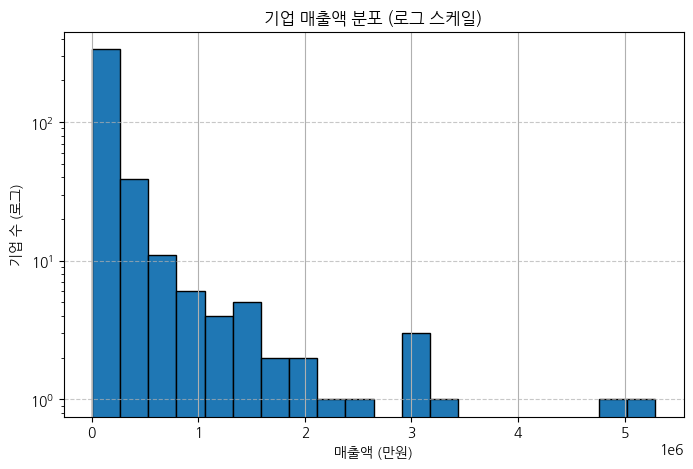

(np.float64(225921.4503631961),
 np.float64(44663.0),
              기업이름      매출액
 60          (주)세성  5289063
 49        (주)엔티렉스  4952332
 5          (주)세스텍  3411870
 150       ㈜디에스티로봇  3149048
 53     긱플러스코리아(유)  3065923
 8      (사)캠틱종합기술원  3052982
 120   (주)오픈네트웍시스템  2447242
 17   (주)베어로보틱스코리아  2334668
 4       (주)마루에이치알  2035881
 26        (주)무진기연  1906370)

In [96]:
import koreanize_matplotlib

# 1. 평균 및 중앙값 계산
mean_revenue = saramin_df["매출액"].mean()  # 평균 매출액
median_revenue = saramin_df["매출액"].median()  # 중앙값 매출액

# 2. 매출 상위 10개 기업 추출
top_revenue_companies = saramin_df.nlargest(10, "매출액")[["기업이름", "매출액"]]

# 3. 시각화 - 매출액 분포
plt.figure(figsize=(8, 5))
saramin_df["매출액"].hist(bins=20, edgecolor="black", log=True)  # 로그 스케일 적용 (큰 차이를 보기 위함)
plt.title("기업 매출액 분포 (로그 스케일)")
plt.xlabel("매출액 (만원)")
plt.ylabel("기업 수 (로그)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 4. 결과 출력
mean_revenue, median_revenue, top_revenue_companies


상위 기업들은 200억 원 이상의 매출을 기록.

하지만 중앙값(4.4억 원)이 낮아, 대부분의 기업 매출은 비교적 적음.

매출 분포는 상위 몇 개 기업에 의해 크게 치우쳐 있음.

#### 기업의 최저 연봉 분포

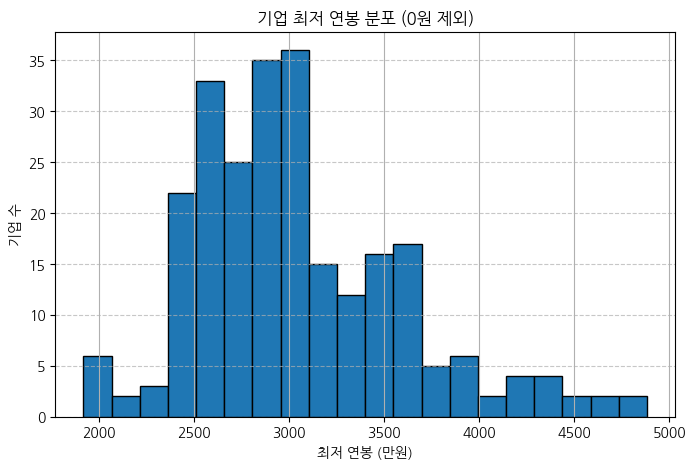

3044.277108433735
1917
4882
기업이름    로빅스(주)
최저연봉      4882
Name: 96, dtype: object
기업이름    (주)도안앤텍
최저연봉       1917
Name: 243, dtype: object


In [ ]:
# 연봉 정보가 0이 아닌 기업만 필터링
salary_filtered_df = saramin_df[saramin_df["최저연봉"] > 0]

# 1. 평균 연봉, 최저 연봉, 최고 연봉 재계산
mean_salary_filtered = salary_filtered_df["최저연봉"].mean()  # 평균 연봉
min_salary_filtered = salary_filtered_df["최저연봉"].min()  # 최저 연봉
max_salary_filtered = salary_filtered_df["최저연봉"].max()  # 최고 연봉

# 2. 연봉이 가장 높은 기업 & 가장 낮은 기업 찾기
highest_salary_company_filtered = salary_filtered_df.loc[
    salary_filtered_df["최저연봉"].idxmax(), ["기업이름", "최저연봉"]
]
lowest_salary_company_filtered = salary_filtered_df.loc[
    salary_filtered_df["최저연봉"].idxmin(), ["기업이름", "최저연봉"]
]

# 3. 연봉 분포 시각화 (0원 제외)
plt.figure(figsize=(8, 5))
salary_filtered_df["최저연봉"].hist(bins=20, edgecolor="black")
plt.title("기업 최저 연봉 분포 (0원 제외)")
plt.xlabel("최저 연봉 (만원)")
plt.ylabel("기업 수")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 4. 결과 출력
print(mean_salary_filtered)
print(min_salary_filtered)
print(max_salary_filtered)
print(highest_salary_company_filtered)
print(lowest_salary_company_filtered)


평균 최저 연봉은 약 3,044만 원으로, 일반적인 평균 연봉보다 낮은 편.

최저 연봉이 4,882만 원 이상인 기업도 존재하며, 연봉 분포가 기업마다 다름.

#### 기업 형태별 비율 분석

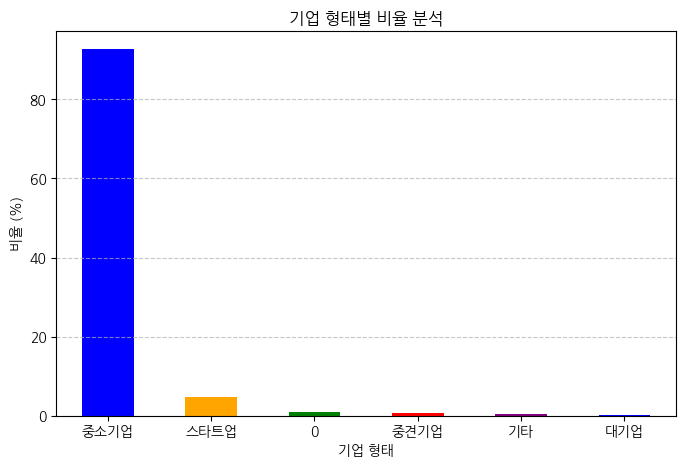

In [109]:
# 1. 기업 형태별 개수 및 비율 계산
company_type_counts = saramin_df["기업형태"].value_counts()
company_type_ratio = (company_type_counts / company_type_counts.sum()) * 100  # 비율 계산 (%)

# 2. 기업 형태별 비율 시각화
plt.figure(figsize=(8, 5))
company_type_ratio.plot(kind="bar", color=["blue", "orange", "green", "red", "purple"])
plt.title("기업 형태별 비율 분석")
plt.xlabel("기업 형태")
plt.ylabel("비율 (%)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 3. 기업 형태별 비율 데이터 정리
company_type_df = pd.DataFrame({
    "기업 형태": company_type_counts.index,
    "기업 수": company_type_counts.values,
    "비율 (%)": company_type_ratio.values
})

#### 업력과 매출액 관계

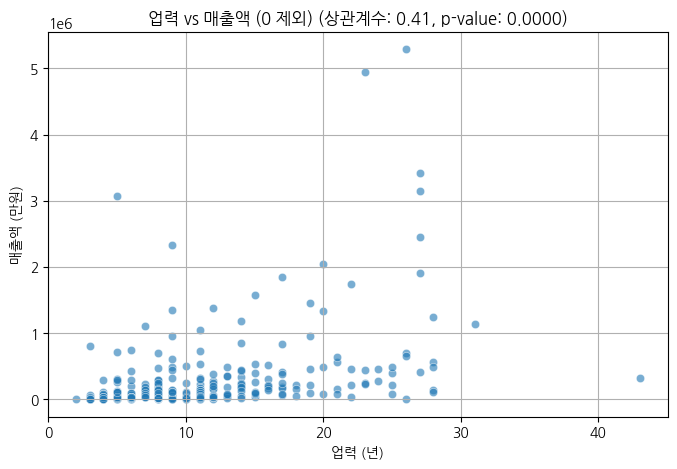

(np.float64(0.41047937802310397), np.float64(6.895892312327763e-13))

In [115]:
# 1. 업력과 매출액이 0이 아닌 데이터만 필터링
df_filtered_revenue_nonzero = saramin_df[(saramin_df["업력"] > 0) & (saramin_df["매출액"] > 0)]

# 2. 업력과 매출액의 상관계수 재계산
correlation_revenue_nonzero, p_value_revenue_nonzero = scipy.stats.pearsonr(
    df_filtered_revenue_nonzero["업력"], df_filtered_revenue_nonzero["매출액"]
)

# 3. 업력 vs 매출액 시각화 (0 제외)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_filtered_revenue_nonzero["업력"], y=df_filtered_revenue_nonzero["매출액"], alpha=0.6)
plt.title(f"업력 vs 매출액 (0 제외) (상관계수: {correlation_revenue_nonzero:.2f}, p-value: {p_value_revenue_nonzero:.4f})")
plt.xlabel("업력 (년)")
plt.ylabel("매출액 (만원)")
plt.grid(True)
plt.show()

# 4. 결과 출력
correlation_revenue_nonzero, p_value_revenue_nonzero


오래된 기업일수록 매출이 증가하는 경향이 있다.

다만, 상관계수가 0.41로 "완전히 강한 관계"라고 보기는 어려움.

p-value가 매우 작기 때문에 통계적으로 신뢰할 수 있는 결과임.

업력이 높다고 무조건 매출이 높은 것은 아니지만, 평균적으로는 증가하는 경향을 보임.

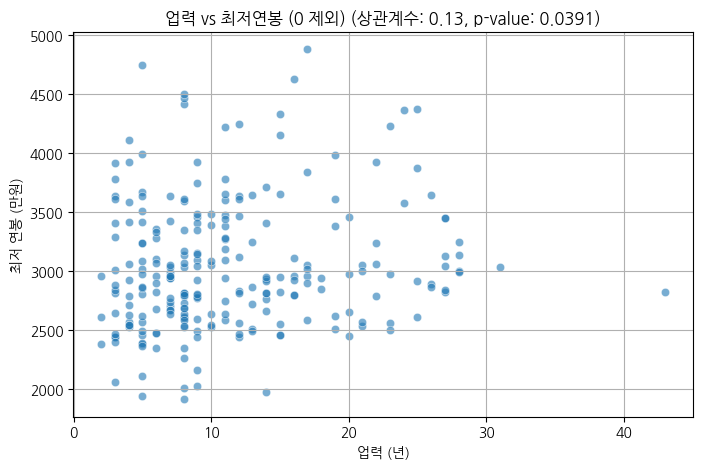

(np.float64(0.1327070458184893), np.float64(0.039123936870155834))

In [114]:
# 1. 업력과 최저연봉이 0이 아닌 데이터만 필터링
df_filtered_salary_nonzero = saramin_df[(saramin_df["업력"] > 0) & (saramin_df["최저연봉"] > 0)]

# 2. 업력과 최저연봉의 상관계수 재계산
correlation_salary_nonzero, p_value_salary_nonzero = scipy.stats.pearsonr(
    df_filtered_salary_nonzero["업력"], df_filtered_salary_nonzero["최저연봉"]
)

# 3. 업력 vs 최저연봉 시각화 (0 제외)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_filtered_salary_nonzero["업력"], y=df_filtered_salary_nonzero["최저연봉"], alpha=0.6)
plt.title(f"업력 vs 최저연봉 (0 제외) (상관계수: {correlation_salary_nonzero:.2f}, p-value: {p_value_salary_nonzero:.4f})")
plt.xlabel("업력 (년)")
plt.ylabel("최저 연봉 (만원)")
plt.grid(True)
plt.show()

# 4. 결과 출력
correlation_salary_nonzero, p_value_salary_nonzero


업력이 높은 기업일수록 최저연봉이 약간 증가하는 경향이 있음.

하지만 상관계수가 0.13으로 매우 낮음, 즉 오래된 기업이 최저연봉을 많이 준다고 단정할 수 없음.

p-value가 0.039로 유의미한 수준이긴 하지만, 강한 상관관계를 의미하지는 않음.

즉, 기업의 업력이 최저연봉을 결정하는 중요한 요인은 아닐 가능성이 큼.